<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/analyze_gluc_trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install openpyxl
!pip install XlsxWriter
# !pip install pingouin
# !pip install CMH
# !pip install svgutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=778f9994360f9ba3d8385f5c4792c3fd798d0549b0b2b5f0805c5f2abe466016
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tifffile
import numpy as np
from google import colab
from matplotlib import pyplot as plt
import scipy
from tqdm import tqdm
import matplotlib as mpl
import pandas as pd

In [4]:
def get_drobox_file(new_filename, link):
    !wget -O $new_filename $link
    return new_filename


In [20]:
link = 'https://www.dropbox.com/sh/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa?dl=1'
new_filename = 'data.xlsx'
get_drobox_file(new_filename, link)

--2023-05-24 22:01:03--  https://www.dropbox.com/sh/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/dl/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa [following]
--2023-05-24 22:01:03--  https://www.dropbox.com/sh/dl/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8988707ef179c1d2e508f855b.dl.dropboxusercontent.com/zip_download_get/BgGFgQkOCahHnKCDcZiEJ6yPe6Ah8RUH8YYPGbgeOcCtsP5umnNztJ6I9lXFnAxRcO9N_IhEatqb2dRW5QyxFU1vxGhFi1haV81q1Kxi_9AEZQ?dl=1# [following]
--2023-05-24 22:01:04--  https://ucd8988707ef179c1d2e508f855b.dl.dropboxusercontent.com/zip_download_get/BgGFgQkOCahHnKCDcZiEJ6yPe6Ah8RUH8YYPGbgeOcCtsP5umnNztJ6I9lXFnAxRcO9N_IhEatqb2dRW5QyxFU1vx

'data.xlsx'

In [17]:
!pip install openpyxl
!pip install XlsxWriter
# /content/data.xlsx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [32]:
v.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...)],
           )

In [253]:
my_df_dict  = pd.read_excel('/content/Glucose data May2023.xlsx',engine='openpyxl',header=[0,1,2,3],index_col=None,sheet_name=None) 

for k,v in my_df_dict.items():
    v=v.drop(0,axis=0).reset_index().drop('index',axis=1)
    for c in v.columns:
        if v[c].isnull().all():
            v=v.drop(c,axis=1)
    my_df_dict[k]=v
display(v.head())

Control                                                               \
       10Hz                                                          5Hz   
  Integrals                  fEPSP slope    Glucose            Integrals   
        LFP  PopSpike Unnamed: 3_level_3       Soma  Dendrites       LFP   
0  4.045425  1.855062           0.176973  1443.6920  1066.4189  2.831924   
1  5.213486  3.062613           0.335929  1443.6920  1066.4189  3.960110   
2  6.131205  3.716932           0.363715  1445.8199  1067.7860  3.511753   
3  7.331403  4.476439           0.348921  1444.6880  1067.1980  4.551023   
4  8.298912  4.855753           0.367518  1444.6130  1067.0620  4.610928   

                                                          PMA            \
                                                         10Hz             
                   fEPSP slope    Glucose           Integrals             
   PopSpike Unnamed: 9_level_3       Soma Dendrites       LFP  PopSpike   
0  1.815777           0.192501  1399.2830  1028.892  0.408929  0.690539   
1  2.493269           0.266004  1399.2830  1028.892  1.081057  0.828124   
2  2.053993           0.279454  1400.3669  1030.098  1.463295  0.826709   
3  2.929596           0.300443  1400.6080  1029.501  1.368460  1.221470   
4  2.789588           0.300111  1400.9580  1029.537  2.004586  1.416326   

                                             
                                             
          fEPSP slope    Glucose             
  Unnamed: 15_level_3       Soma  Dendrites  
0            0.155780  1651.0811  1367.9600  
1            0.277240  1651.0811  1367.9600  
2            0.323449  1650.5690  1368.5490  
3            0.277353  1652.3300  1368.7360  
4            0.290033  1652.6390  1368.1219

In [254]:
for k,v in my_df_dict.items():
    # df_time
    my_df_dict[k]={'values':v,'time':df_time}

In [255]:
from scipy.signal import butter,filtfilt
import scipy

def exp_func(xdata,a,b,c):
    return a*np.exp(xdata/-b) + c

def bleach_cor(trace,ref_inds,lpf=0.2,order=1):

    # b, a = butter(order, lpf, btype='lowpass')
    # trace_f = filtfilt(b, a, trace)
    trace_f = trace    
    good_ref = np.logical_not(np.isnan( trace_f[ref_inds]))
    ref_inds = ref_inds[good_ref]
    y_fittable = trace_f[ref_inds]
    p0= [np.max(trace), 20000, np.min(trace)]
    min_bound = [0,1000,0]
    max_bound = [np.max(trace)*2,np.inf,np.max(trace)*2]
    p = scipy.optimize.curve_fit(exp_func, ref_inds, y_fittable,p0=p0,bounds=(min_bound,max_bound))
    bleach_trace = exp_func(np.arange(len(trace)), p[0][0], p[0][1], p[0][2])
    trace_corr = trace/bleach_trace * (p[0][0]+p[0][2])
    return trace_corr, bleach_trace



# y = v[('Control', '10Hz', 'Glucose', 'Soma')]
# trace = np.abs(z_trans(trace)) >6


# ref_inds = np.concatenate([np.arange(200,1000),np.arange(5000,6999)])
# trace_corr, bleach_trace = bleach_cor(trace,ref_inds)



In [256]:
def z_trans(y):
    return (y-np.nanmean(y))/np.nanstd(y)

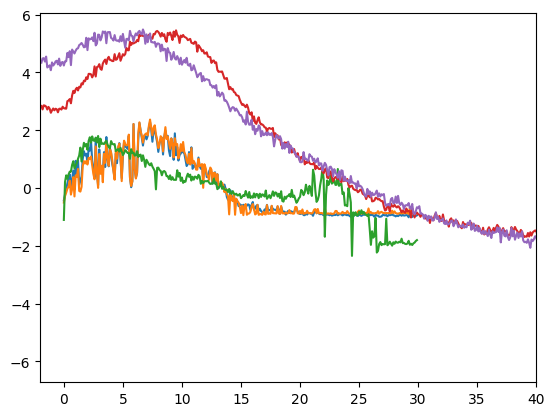

In [274]:
fig, ax =plt.subplots()


df_time = v.copy()
basic_offset = -3.75
for c in v.columns:
    freq = int(c[1].replace('Hz',""))
    'Base Pclamp Timing'
    if 'LFP' in c[3] or 'PopSpike' in c[3] or 'fEPSP slope' in c[2]:
        pulse_t_ind = np.arange(np.sum(v[c].notnull()))

        pulse_t = pulse_t_ind.astype('float') * 1/freq
        for i in pulse_t_ind:
            df_time.at[i,c] = pulse_t[i]
    

    'Syncronize Camera'
    if 'Glucose' in c[2]:
        df_time[c] = pd.Series((np.arange(len(v[c])))/10)
        y = np.array(v[c])
        is_dip = z_trans(y) < -15
        pulse_ind = np.where(is_dip)[0]
        y_t = df_time[c][pulse_ind]
        
        pulse_time = np.mean(y_t)
        
        df_time[c] = pd.Series((np.arange(len(v[c])))/10) - pulse_time + basic_offset
        # print(df_time[c])
        # break
    # display(df_time.head(20))
    if '10Hz' in c[1] and 'Control' in c[0]:
        if 'LFP' in c[3] or 'PopSpike' in c[3] or 'fEPSP slope' in c[2]:        
            ax.plot( df_time[c],z_trans(v[c]))
        if 'Glucose' in c[2]:
            y=v[c]
            t = df_time[c]
            pt = t>-2
            ax.plot( t[pt],z_trans(y[pt]))
        ax.set_xlim(-2,40)
        # for a in ax: 

In [ ]:
'''
Bleach Correct all Traces,
Convert to dF/f
Z-Score
Upsample
Cross corr 

'''